# Customer Segmentation

Suppose that we have a company that selling some of the product, and you want to know how well does the selling performance of the product.

You have the data that can we analyze, but what kind of analysis that we can do? We can segment customers based on their buying behavior on the market. As the dataset is really huge, and we can not analyze it using our bare eye. We will use machine learning algorithms and the power of computing for it. This article will show you how to cluster customers on segments based on their behavior using the K-Means algorithm in Python. I hope that this article will help you on how to do customer segmentation step-by-step from preparing the data to cluster it.

In [1]:
import gc
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from IPython.display import Image

from sklearn.cluster import KMeans

In [2]:
ls

Market_Basket_Analysis_Customer_Segmentation.ipynb  online_retail.xlsx
market_basket_analysis.ipynb


In [3]:
df=pd.read_excel('online_retail.xlsx')

In [4]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [5]:
#Drop Records Without Customer ID and Invoice
df.dropna(axis=0, subset=['Customer ID'], inplace=True)
df.dropna(axis=0, subset=['Invoice'], inplace=True)

In [7]:
#PreProcessing of the data
# Drop cancelled orders
df = df.loc[df['Quantity'] > 0]

# Drop incomplete month
df = df.loc[df['InvoiceDate'] < '2010-12-01']

# Calculate total sales from the Quantity and UnitPrice
df['Sales'] = df['Quantity'] * df['Price']

# use groupby to aggregate sales by CustomerID
customer_df = df.groupby('Customer ID').agg({'Sales': sum, 
                                            'Invoice': lambda x: x.nunique()})

# Select the columns we want to use
customer_df.columns = ['TotalSales', 'OrderCount'] 

# create a new column 'AvgOrderValu'
customer_df['AvgOrderValue'] = customer_df['TotalSales'] / customer_df['OrderCount']

customer_df.head()

,TotalSales,OrderCount,AvgOrderValue
Customer ID,,,
12346.0,372.86,11,33.896364
12347.0,611.53,1,611.530000
12348.0,222.16,1,222.160000
12349.0,2671.14,3,890.380000
12351.0,300.93,1,300.930000


In [8]:
rank_df = customer_df.rank(method='first')
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()
normalized_df.head(10)

,TotalSales,OrderCount,AvgOrderValue
Customer ID,,,
12346.0,-0.638284,1.484731,-1.694922
12347.0,-0.128631,-1.731442,1.315929
12348.0,-1.144691,-1.730631,-0.511682
12349.0,1.218542,0.090488,1.538293
12351.0,-0.892299,-1.729819,0.083184
12352.0,-0.716193,-0.568491,-0.939369
12353.0,-0.814391,-1.729008,0.259290
12355.0,-0.363980,-1.728196,1.074898
12356.0,1.371925,0.091299,1.629998


In [11]:
# Use silhouette coefficient to determine the best number of clusters

from sklearn.metrics import silhouette_score

for n_cluster in [4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n_cluster).fit(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])
    
    silhouette_avg = silhouette_score(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']], 
        kmeans.labels_)
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

/home/soumitra/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 4 Clusters: 0.4141


/home/soumitra/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 5 Clusters: 0.3805


/home/soumitra/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 6 Clusters: 0.3870


/home/soumitra/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 7 Clusters: 0.3768


/home/soumitra/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 8 Clusters: 0.3821


/home/soumitra/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/soumitra/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/soumitra/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/soumitra/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/soumitra/a

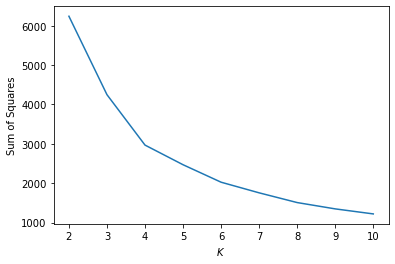

In [12]:
# The Elbow Method with the Sum of Squared Errors (SSE)

from sklearn import cluster
import numpy as np

sse = []
krange = list(range(2,11))
X = normalized_df[['TotalSales','OrderCount','AvgOrderValue']].values
for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=3)
    model.fit_predict(X)
    cluster_assignments = model.labels_
    centers = model.cluster_centers_
    sse.append(np.sum((X - centers[cluster_assignments]) ** 2))

plt.plot(krange, sse)
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")
plt.show()

In [13]:
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])

/home/soumitra/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

four_cluster_df.head(20)

,TotalSales,OrderCount,AvgOrderValue,Cluster
Customer ID,,,,
12346.0,-0.638284,1.484731,-1.694922,2
12347.0,-0.128631,-1.731442,1.315929,3
12348.0,-1.144691,-1.730631,-0.511682,1
12349.0,1.218542,0.090488,1.538293,0
12351.0,-0.892299,-1.729819,0.083184,3
12352.0,-0.716193,-0.568491,-0.939369,1
12353.0,-0.814391,-1.729008,0.259290,3
12355.0,-0.363980,-1.728196,1.074898,3
12356.0,1.371925,0.091299,1.629998,0


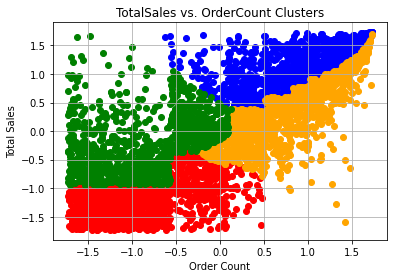

In [15]:
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
c='blue')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
c='red')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
c='orange')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
c='green')
plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

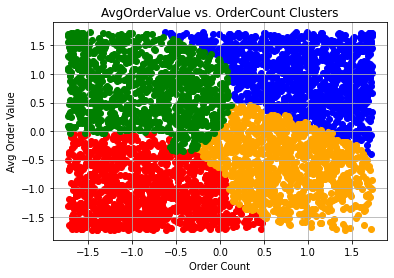

In [16]:
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
c='blue')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
c='red')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
c='orange')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
c='green')
plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Avg Order Value')
plt.grid()
plt.show()

In [18]:
#Best Selling items by group
high_value_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 2]
pd.DataFrame(df.loc[df['Customer ID'].isin(high_value_cluster.index)].groupby(
'Description').count()['StockCode'].sort_values(ascending=False).head())

,StockCode
Description,
WHITE HANGING HEART T-LIGHT HOLDER,831
REX CASH+CARRY JUMBO SHOPPER,486
STRAWBERRY CERAMIC TRINKET BOX,404
REGENCY CAKESTAND 3 TIER,396
HOME BUILDING BLOCK WORD,315


# Customer Retention

It is important for a business to understand if their products are selling well. It is arguably more important to understand if their customers enjoyed the product they bought from you enough to make a repeated purchase. One way to look at this is using following metrics:

customer retention rates
the average quantity purchased
the average price by segmenting them into cohorts

In [19]:
dfa=pd.read_excel('online_retail.xlsx')

In [20]:
dfa

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [22]:
#Drop Records Without Customer ID and Invoice
dfa.dropna(axis=0, subset=['Customer ID'], inplace=True)
dfa.dropna(axis=0, subset=['Invoice'], inplace=True)

In [23]:
dfa.shape

(417534, 8)

In [24]:
# -- Convert InvoiceDate from object to datetime format
dfa['InvoiceDate'] = pd.to_datetime(dfa['InvoiceDate'])

In [27]:
# --Group customers in acquisition cohorts based on the month they made their first purchase--

# Create function to truncate given date in column to a first day of the month
def get_month(x): 
    return dt.datetime(x.year, x.month, 1)

# Apply function to invoice date to invoice month column
dfa['InvoiceMonth'] = dfa['InvoiceDate'].apply(get_month)

grouping1 = dfa.groupby('Customer ID')['InvoiceMonth']

dfa['CohortMonth'] = grouping1.transform('min')

print(dfa.describe())

            Quantity          Price    Customer ID
count  417534.000000  417534.000000  417534.000000
mean       12.758815       3.887547   15360.645478
std       101.220424      71.131797    1680.811316
min     -9360.000000       0.000000   12346.000000
25%         2.000000       1.250000   13983.000000
50%         4.000000       1.950000   15311.000000
75%        12.000000       3.750000   16799.000000
max     19152.000000   25111.090000   18287.000000


In [28]:
dfa

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth,CohortMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,2009-12-01
...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010-12-01,2009-12-01
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01


In [29]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417534 entries, 0 to 525460
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       417534 non-null  object        
 1   StockCode     417534 non-null  object        
 2   Description   417534 non-null  object        
 3   Quantity      417534 non-null  int64         
 4   InvoiceDate   417534 non-null  datetime64[ns]
 5   Price         417534 non-null  float64       
 6   Customer ID   417534 non-null  float64       
 7   Country       417534 non-null  object        
 8   InvoiceMonth  417534 non-null  datetime64[ns]
 9   CohortMonth   417534 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(1), object(4)
memory usage: 35.0+ MB


In [30]:
# Calculate the date difference between the first transaction and the next activity. 
#We will create a function and apply it to our dataframe.

def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [34]:
invoice_year, invoice_month, _ = get_date_int(dfa, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(dfa, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

In [35]:
#Build the cohort index based on the number of months since the first transaction
dfa['CohortIndex'] = years_diff * 12 + months_diff + 1
dfa.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,2009-12-01,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,2009-12-01,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,2009-12-01,1


In [37]:
#Count monthly active customers from each cohort which went on to make a subsequent purchase at a later month
grouping_count = dfa.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping_count['Customer ID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='Customer ID')
print(cohort_counts.head())

CohortIndex      1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                   
2009-12-01   1045.0  392.0  358.0  447.0  410.0  408.0  408.0  374.0  355.0   
2010-01-01    394.0   86.0  119.0  120.0  110.0  115.0  105.0   91.0  114.0   
2010-02-01    363.0  109.0   82.0  110.0   93.0   76.0   79.0  103.0  100.0   
2010-03-01    436.0   95.0  113.0  103.0  100.0   87.0  105.0  130.0  126.0   
2010-04-01    291.0   67.0   58.0   47.0   54.0   67.0   79.0   76.0   22.0   

CohortIndex     10     11     12     13  
CohortMonth                              
2009-12-01   392.0  452.0  518.0  260.0  
2010-01-01   134.0  122.0   37.0    NaN  
2010-02-01   106.0   32.0    NaN    NaN  
2010-03-01    36.0    NaN    NaN    NaN  
2010-04-01     NaN    NaN    NaN    NaN  


In [38]:
#Get the customers retained each month as a percentage of the total size of the cohort by month
# --Calculate Retention Rate--
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3) * 100
retention.index = retention.index.strftime('%m-%Y')

In [40]:
# --Calculate Average Quantity--
grouping_qty = dfa.groupby(['CohortMonth', 'CohortIndex'])
cohort_data_qty = grouping_qty['Quantity'].mean()
cohort_data_qty = cohort_data_qty.reset_index()
average_quantity = cohort_data_qty.pivot(index='CohortMonth',
                                     columns='CohortIndex',
                                     values='Quantity')
average_quantity.index = average_quantity.index.strftime('%m-%Y')

In [41]:
average_quantity

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
12-2009,12.288602,21.905026,20.101144,21.171872,12.757895,13.604298,13.712743,13.754921,23.829158,10.452864,14.984110,13.326669,12.157061
01-2010,8.981818,12.772803,9.122480,12.536222,11.000350,11.533820,9.901275,12.059826,10.696880,12.274895,10.045257,5.785092,NaN
02-2010,9.680669,9.060498,15.257630,12.640979,9.650355,11.545991,11.762391,10.107898,9.227087,9.023824,8.479554,NaN,NaN
03-2010,9.928953,13.561131,11.532507,10.996527,10.593976,14.972189,13.792837,12.579000,10.965389,18.452532,NaN,NaN,NaN
04-2010,10.371736,7.992322,9.031792,14.584470,12.765138,10.656608,9.802041,8.896396,7.241071,NaN,NaN,NaN,NaN
05-2010,11.819219,9.562929,9.951777,12.266846,12.584932,9.146013,7.187648,4.928118,NaN,NaN,NaN,NaN,NaN
06-2010,9.950548,8.264493,13.020000,10.468919,10.692693,13.759615,11.751131,NaN,NaN,NaN,NaN,NaN,NaN
07-2010,7.745206,6.666667,6.731605,8.363125,6.937856,6.395299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08-2010,7.968184,8.246225,8.540422,7.302992,12.727941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# --Calculate Average Price--
grouping_price = dfa.groupby(['CohortMonth', 'CohortIndex'])
cohort_data_price = grouping_price['Price'].mean()
cohort_data_price = cohort_data_price.reset_index()
average_price = cohort_data_price.pivot(index='CohortMonth',
                                     columns='CohortIndex',
                                     values='Price')
average_price.index = average_price.index.strftime('%m-%Y')

In [43]:
average_price

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
12-2009,3.354071,5.776685,3.316184,3.313600,3.643306,3.426955,3.222763,3.538198,3.402884,5.021589,5.285083,3.115029,3.206994
01-2010,3.255020,2.969431,3.217111,3.423700,3.411140,3.626910,4.123645,3.083736,4.032225,3.698082,3.228962,3.247202,NaN
02-2010,3.610299,3.233828,4.825242,3.158766,3.230379,3.280330,4.788649,2.854053,2.806362,3.125514,3.244071,NaN,NaN
03-2010,9.274265,3.120589,3.090210,3.020313,3.157144,3.027666,2.728388,2.991303,3.085132,3.233323,NaN,NaN,NaN
04-2010,5.411056,3.541142,3.516821,3.918657,2.922211,2.888914,2.935607,3.257432,4.055208,NaN,NaN,NaN,NaN
05-2010,3.302466,3.416373,2.948401,2.720027,2.994740,2.771580,3.021479,3.068753,NaN,NaN,NaN,NaN,NaN
06-2010,8.606369,6.451286,2.856750,3.277189,3.080465,2.977364,3.357195,NaN,NaN,NaN,NaN,NaN,NaN
07-2010,4.338386,3.309344,2.637542,3.057369,3.187263,2.958013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08-2010,3.192630,3.346992,3.201610,3.062241,2.575784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


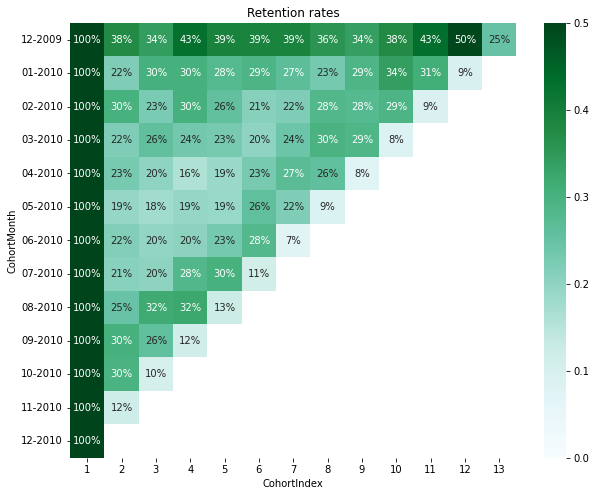

In [44]:
#Plot Heatmap with Seaborn
# Plot retention rates
plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(data = retention, annot = True, fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap = 'BuGn')
plt.show()

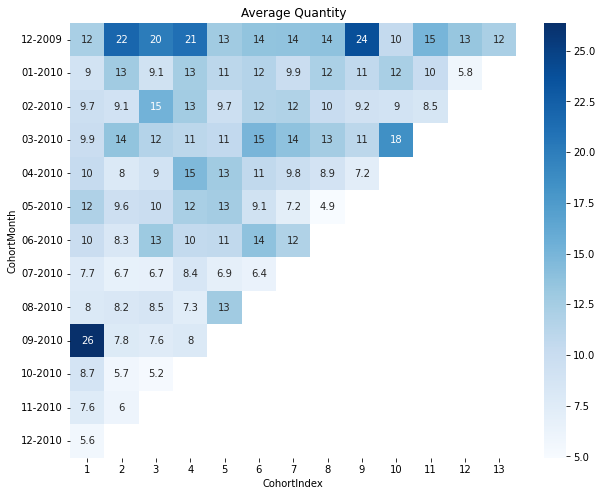

In [45]:
# Plot average quantity
plt.figure(figsize=(10, 8))
plt.title('Average Quantity')
sns.heatmap(data = average_quantity, annot=True, cmap='Blues')
plt.show()

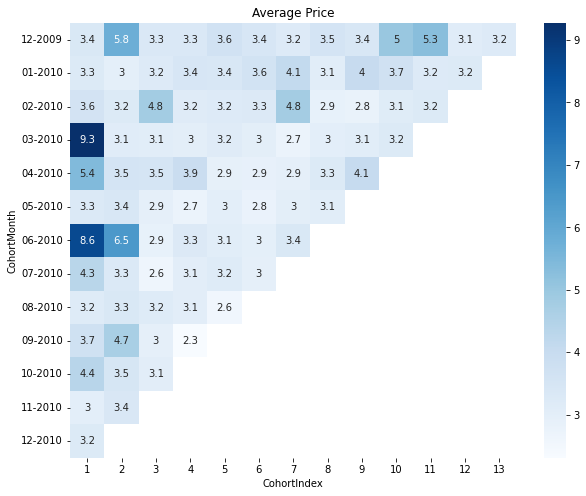

In [46]:
# Plot average price
plt.figure(figsize=(10, 8))
plt.title('Average Price')
sns.heatmap(data = average_price, annot=True, cmap='Blues')
plt.show()